In [1]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [2]:
# 법령 XML 상세조회 (시행기준. target=eflaw)

#기본 url
url_base = " http://www.law.go.kr/DRF/lawService.do"

#조회 url 세부 설정
user_id = 'bmsong' #open API ID (bmsong@kau.ac.kr의 아이디 부분)
target = "eflaw" #법령 조회시
MST = "218289" #ID 또는 MST #산업안전보건법 MST 218289
#ID = "001766" 
            #ID 산업안전보건법 법령ID 001766 (설명에는 ID로 조회하면 현행법령이 조회된다는데, 
            #target을 eflaw로 하면 ID로 요청해도, MST로 요청해도 같은 것 같다.
Type = "XML" #출력 형태 : HTML 또는 XML

url_sub = "?" +\
        "OC=" + user_id +\
        "&target=" + target +\
        "&MST=" + MST +\
        "&type=" + Type

#최종 url
url = url_base + url_sub

print(url)

response = requests.get(url)

#(1) response.text 사용하는 방법
#soup = BeautifulSoup(response.text.encode('utf-8'), 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)

#(2) response.content 사용하는 방법
soup = BeautifulSoup(response.content, 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)


# soup

 http://www.law.go.kr/DRF/lawService.do?OC=bmsong&target=eflaw&MST=218289&type=XML


In [3]:
lc_basic_df = pd.DataFrame() #DataFrame for Law Content 

data = soup.find('법령ID') #MST 정보
lc_basic_df['법령ID'] = [data.get_text()]

data = soup.find('법종구분') 
lc_basic_df['법종구분']= [data.get_text()]

data = soup.find('법령명_한글') 
lc_basic_df['법령명']= [data.get_text()]

data = soup.find('시행일자')
lc_basic_df['시행일자'] = [data.get_text()]

data = soup.find('공포일자') 
lc_basic_df['공포일자']= [data.get_text()]

data = soup.find('소관부처') 
lc_basic_df['소관부처']= [data.get_text()]

lc_basic_df

,법령ID,법종구분,법령명,시행일자,공포일자,소관부처
0,001766,법률,산업안전보건법,20210116,20200526,고용노동부


In [4]:
# data = soup.find_all('조문단위')
# df_info = pd.DataFrame()
# info = []
# for i in data:
#     detail = {}
#     detail["index"] = np.nan
#     detail["조문제목"] = np.nan
#     detail["조문내용"] = np.nan
#     detail["항문내용"] = np.nan
#     detail["호문내용"] = np.nan
#     if i.find("조문여부").get_text() == "조문":
#         조문제목 = i.find("조문내용").get_text().strip().split(")")[0]+")"
#         detail["조문제목"] = 조문제목
#         if i.find("조문내용"):
#             조문내용 = i.find("조문내용").get_text().strip()[len(조문제목):-1].strip()
#             detail["조문내용"] = 조문내용
        
#         df_info = df_info.append(detail,ignore_index = True)

#         if i.find("항내용"):
#             for j in i.find_all("항내용"):
#                 detail["항문내용"] = j.get_text().strip()
#                 df_info = df_info.append(detail,ignore_index = True)
#                 if i.find("호내용"):
#                     for k in i.find_all("호내용"):
#                         detail["호문내용"] = k.get_text().strip()
#                         df_info = df_info.append(detail,ignore_index = True)
#                 detail["호문내용"] = np.nan
# df_info = df_info[["조문제목","조문내용","항문내용","호문내용"]]
# df_info.head(30)

In [5]:
# data = soup.find_all('조문단위')
# df_info = pd.DataFrame()
# info = []
# for i in data:
#     detail = {}
#     detail["index"] = np.nan
#     detail["조문제목"] = np.nan
#     detail["조문내용"] = np.nan
#     detail["항문내용"] = np.nan
#     detail["호문내용"] = np.nan
#     if i.find("조문여부").get_text() == "조문":
#         조문제목 = i.find("조문내용").get_text().strip().split(")")[0]+")"
#         detail["조문제목"] = 조문제목
#         if i.find("조문내용"):
#             조문내용 = i.find("조문내용").get_text().strip()[len(조문제목):-1].strip()
#             detail["조문내용"] = 조문내용
        
#         df_info = df_info.append(detail,ignore_index = True)
        
#         if i.find("항"):
#             for j in i.find_all("항"):
#                 if j.find("항내용"):
#                     detail["항문내용"] = j.항내용.get_text().strip()
#                     df_info = df_info.append(detail,ignore_index = True)
#                 if j.find("호내용"):
#                     for k in j.find_all("호내용"):
#                         detail["호문내용"] = k.get_text().strip()
#                         df_info = df_info.append(detail,ignore_index = True)
#                 detail["호문내용"] = np.nan
# df_info = df_info[["조문제목","조문내용","항문내용","호문내용"]]
# df_info

In [6]:
data = soup.find_all('조문단위')
df_info = pd.DataFrame()
info = []
for i in data:
    info_str = ""
    if i.find("조문여부").get_text() == "조문":
        info_str += i.조문내용.get_text().strip()
        if i.항:
            hang_nums = i.find_all("항번호")
            ho_nums = i.find_all("호번호")
            for idx, p in enumerate(i.find_all("호내용")):
                info_str += p.get_text().split(ho_nums[idx].get_text())[1].strip()
            for hang_idx, k in enumerate(i.find_all("항내용")):
                info_str += k.get_text().strip().split(hang_nums[hang_idx].get_text())[1].strip()
                for ho_idx ,j in enumerate(i.find_all("호내용")):
                    info_str += j.get_text().strip().split(ho_nums[ho_idx].get_text())[1].strip()
        info.append(info_str)
df_info["조내용"] = info
df_info

,조내용
0,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업..."
3,제4조(정부의 책무)산업 안전 및 보건 정책의 수립 및 집행산업재해 예방 지원 및 ...
4,제5조(사업주 등의 의무)이 법과 이 법에 따른 명령으로 정하는 산업재해 예방을 위...
...,...
172,제171조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1천만원 이하의 벌금에 ...
173,제172조(벌칙) 제64조제1항 또는 제2항을 위반한 자는 500만원 이하의 벌금에...
174,"제173조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 ..."
175,제174조(형벌과 수강명령 등의 병과)안전 및 보건에 관한 교육그 밖에 산업재해 예...


In [7]:
#df_info.to_excel('산업안전보건법.xlsx',index = False)

In [8]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

In [9]:
twitter = Twitter()

C:\Users\assay\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
word_list = []
word_list = df_info['조내용']

In [11]:
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

print(morph)

[('제', 'Noun'), ('175조', 'Number'), ('(', 'Punctuation'), ('과태료', 'Noun'), (')', 'Punctuation'), ('제', 'Noun'), ('119조', 'Number'), ('제', 'Foreign'), ('2', 'Number'), ('항', 'Noun'), ('에', 'Josa'), ('따라', 'Verb'), ('기', 'Modifier'), ('관석', 'Noun'), ('면', 'Josa'), ('조사', 'Noun'), ('를', 'Josa'), ('하지', 'Verb'), ('아니하고', 'Adjective'), ('건축물', 'Noun'), ('또는', 'Adverb'), ('설비', 'Noun'), ('를', 'Josa'), ('철거', 'Noun'), ('하', 'Suffix'), ('거나', 'Noun'), ('해체', 'Noun'), ('한', 'Josa'), ('자제', 'Noun'), ('124조', 'Number'), ('제', 'Foreign'), ('3', 'Number'), ('항', 'Noun'), ('을', 'Josa'), ('위반', 'Noun'), ('하여', 'Verb'), ('건축물', 'Noun'), ('또는', 'Adverb'), ('설비', 'Noun'), ('를', 'Josa'), ('철거', 'Noun'), ('하', 'Suffix'), ('거나', 'Noun'), ('해체', 'Noun'), ('한', 'Josa'), ('자제', 'Noun'), ('29조', 'Number'), ('제', 'Foreign'), ('3', 'Number'), ('항', 'Noun'), ('(', 'Punctuation'), ('제', 'Noun'), ('166조', 'Number'), ('의', 'Foreign'), ('2', 'Number'), ('에서', 'Josa'), ('준용', 'Noun'), ('하는', 'Verb'), ('경우', 'Noun'), (

In [12]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [13]:
len(noun_list)

34455

In [14]:
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['목적',
 '산업',
 '안전',
 '보건',
 '기준',
 '확립',
 '책임',
 '소재',
 '산업',
 '재해',
 '예방',
 '작업',
 '환경',
 '성함',
 '노무',
 '제공',
 '사람',
 '안전',
 '보건',
 '유지',
 '증진',
 '목적',
 '개정',
 '정의',
 '사용',
 '용어',
 '다음',
 '개정',
 '산업',
 '재해',
 '노무',
 '제공',
 '사람',
 '업무',
 '관계',
 '건설',
 '설비',
 '재료',
 '가스',
 '증기',
 '분진',
 '작업',
 '업무',
 '사망',
 '부상',
 '거나',
 '질병',
 '중대',
 '재해',
 '산업',
 '재해',
 '사망',
 '재해',
 '정도',
 '다수',
 '재해',
 '발생',
 '경우',
 '로서',
 '고용노동부',
 '재해',
 '근로자',
 '근로기준법',
 '항제',
 '근로자',
 '업주',
 '근로자',
 '사용',
 '사업',
 '근로자',
 '대표',
 '근로자',
 '과반수',
 '조직',
 '노동조합',
 '경우',
 '노동조합',
 '근로자',
 '과반수',
 '조직',
 '노동조합',
 '경우',
 '근로자',
 '과반수',
 '대표',
 '도급',
 '이란',
 '명칭',
 '물건',
 '제조',
 '건설',
 '수리',
 '서비스',
 '제공',
 '업무',
 '타인',
 '계약',
 '도급',
 '이란',
 '물건']

In [15]:
len(noun_list)

24516

In [16]:
# 불용어 리스트
# 불용어, 불필요 단어 제거
stop_words_df = pd.read_excel("stopwords.xlsx")
stop_words_df

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
670,일곱
671,여덟
672,아홉
673,령


In [17]:
for i in range(len(noun_list)):
    if i in list(stop_words_df.get('불용어')):
        noun_list.remove(i)
len(noun_list)

#불용어 리스트로 걸러지는 데이터가 없음

24516

In [18]:
counts = Counter(noun_list)
tags = counts.most_common(30)
tags

[('안전', 980),
 ('경우', 895),
 ('고용노동부', 562),
 ('보건', 544),
 ('자제', 446),
 ('위반', 382),
 ('근로자', 351),
 ('해당', 347),
 ('사항', 334),
 ('작업', 333),
 ('산업', 295),
 ('기관', 274),
 ('장관', 262),
 ('업무', 257),
 ('자료', 255),
 ('물질', 255),
 ('재해', 243),
 ('건강', 237),
 ('사업', 232),
 ('유해', 215),
 ('포함', 211),
 ('거나', 198),
 ('업주', 195),
 ('검사', 195),
 ('진단', 192),
 ('조치', 179),
 ('조사', 178),
 ('인증', 175),
 ('화학물질', 170),
 ('준용', 162)]

{'안전': 980, '경우': 895, '고용노동부': 562, '보건': 544, '자제': 446, '위반': 382, '근로자': 351, '해당': 347, '사항': 334, '작업': 333, '산업': 295, '기관': 274, '장관': 262, '업무': 257, '자료': 255, '물질': 255, '재해': 243, '건강': 237, '사업': 232, '유해': 215, '포함': 211, '거나': 198, '업주': 195, '검사': 195, '진단': 192, '조치': 179, '조사': 178, '인증': 175, '화학물질': 170, '준용': 162}


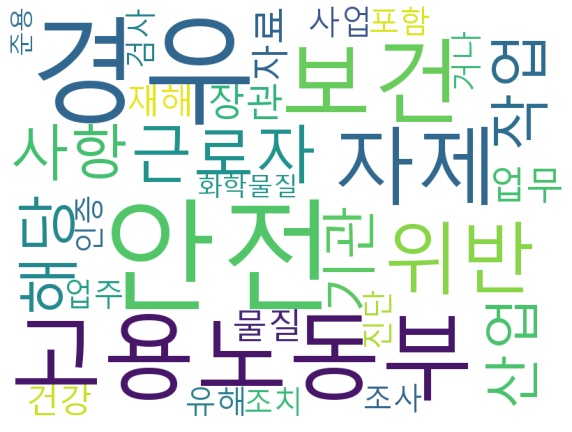

In [19]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     background_color='white',
                     width=800,
                     height=600)

print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = noun_list
vector = CountVectorizer() # default: 길이가 2이상인 단어만 추출 
                           # 띄어쓰기만을 기준

In [21]:
sp_mat = vector.fit_transform(corpus)
sp_mat.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
vector.vocabulary_

{'목적': 257,
 '산업': 388,
 '안전': 508,
 '보건': 311,
 '기준': 155,
 '확립': 985,
 '책임': 843,
 '소재': 445,
 '재해': 684,
 '예방': 540,
 '작업': 666,
 '환경': 990,
 '성함': 433,
 '노무': 173,
 '제공': 733,
 '사람': 368,
 '유지': 584,
 '증진': 789,
 '개정': 21,
 '정의': 726,
 '사용': 379,
 '용어': 558,
 '다음': 185,
 '업무': 517,
 '관계': 92,
 '건설': 31,
 '설비': 425,
 '재료': 679,
 '가스': 6,
 '증기': 784,
 '분진': 352,
 '사망': 369,
 '부상': 338,
 '거나': 25,
 '질병': 825,
 '중대': 777,
 '정도': 713,
 '다수': 183,
 '발생': 276,
 '경우': 52,
 '로서': 238,
 '고용노동부': 62,
 '근로자': 137,
 '근로기준법': 135,
 '항제': 947,
 '업주': 520,
 '사업': 377,
 '대표': 211,
 '과반수': 86,
 '조직': 755,
 '노동조합': 171,
 '도급': 221,
 '이란': 608,
 '명칭': 252,
 '물건': 262,
 '제조': 738,
 '수리': 455,
 '서비스': 411,
 '타인': 886,
 '계약': 55,
 '다만': 182,
 '발주': 279,
 '외한': 548,
 '수급인': 452,
 '여러': 523,
 '단계': 186,
 '체결': 852,
 '별로': 307,
 '전부': 702,
 '공사': 78,
 '자로': 654,
 '시공': 476,
 '총괄': 861,
 '관리': 96,
 '다시': 184,
 '하나': 931,
 '해당': 950,
 '진단': 818,
 '잠재': 669,
 '위험성': 578,
 '발견': 274,
 '개선': 17,
 '대책': 207,
 '수립

In [23]:
posts = df_info.get("조내용")
posts

0      제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1      제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2      제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업...
3      제4조(정부의 책무)산업 안전 및 보건 정책의 수립 및 집행산업재해 예방 지원 및 ...
4      제5조(사업주 등의 의무)이 법과 이 법에 따른 명령으로 정하는 산업재해 예방을 위...
                             ...                        
172    제171조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1천만원 이하의 벌금에 ...
173    제172조(벌칙) 제64조제1항 또는 제2항을 위반한 자는 500만원 이하의 벌금에...
174    제173조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 ...
175    제174조(형벌과 수강명령 등의 병과)안전 및 보건에 관한 교육그 밖에 산업재해 예...
176    제175조(과태료)제119조제2항에 따라 기관석면조사를 하지 아니하고 건축물 또는 ...
Name: 조내용, Length: 177, dtype: object

In [24]:
countv = CountVectorizer().fit(dict(tags))
countv.transform(posts).toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 24,  8]], dtype=int64)

In [25]:
pd.DataFrame(countv.transform(posts).toarray())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,9,0,...,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

C:\Users\assay\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
